# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import Dataset

In [2]:
df = pd.read_csv('traffic.csv')

# Reading Dataset

In [3]:
df.head(5)

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


# Shape of the Dataset

In [4]:
print('Dataset contains', df.shape[0], 'rows and',df.shape[1],'columns')

Dataset contains 226278 rows and 9 columns


# Checking Column names

In [5]:
df.columns

Index(['event', 'date', 'country', 'city', 'artist', 'album', 'track', 'isrc',
       'linkid'],
      dtype='object')

# Info/Datatype

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   event    226278 non-null  object
 1   date     226278 non-null  object
 2   country  226267 non-null  object
 3   city     226267 non-null  object
 4   artist   226241 non-null  object
 5   album    226273 non-null  object
 6   track    226273 non-null  object
 7   isrc     219157 non-null  object
 8   linkid   226278 non-null  object
dtypes: object(9)
memory usage: 15.5+ MB


### Correcting Datatype of Date Column

In [7]:
df['date'] = pd.to_datetime(df['date'])

# Again checking datatype

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   event    226278 non-null  object        
 1   date     226278 non-null  datetime64[ns]
 2   country  226267 non-null  object        
 3   city     226267 non-null  object        
 4   artist   226241 non-null  object        
 5   album    226273 non-null  object        
 6   track    226273 non-null  object        
 7   isrc     219157 non-null  object        
 8   linkid   226278 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 15.5+ MB


# 5 point summary/ describing the dataset

In [9]:
df.describe().T

,count,mean,min,25%,50%,75%,max
date,226278,2021-08-21 21:04:31.768355584,2021-08-19 00:00:00,2021-08-20 00:00:00,2021-08-22 00:00:00,2021-08-24 00:00:00,2021-08-25 00:00:00


In [10]:
df.describe(include = 'object').T

,count,unique,top,freq
event,226278,3,pageview,142015
country,226267,211,Saudi Arabia,47334
city,226267,11993,Jeddah,22791
artist,226241,2419,Tesher,40841
album,226273,3254,Jalebi Baby,40841
track,226273,3562,Jalebi Baby,40841
isrc,219157,709,QZNWQ2070741,40841
linkid,226278,3839,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,40841


# Checking descripecies for the catagorical columns

In [11]:
catagorical_columns = df.select_dtypes(include = 'object')

In [12]:
for i in catagorical_columns:
    print(i)
    print('\n')
    print(df[i].value_counts())
    print('\n')

event


event
pageview    142015
click        55732
preview      28531
Name: count, dtype: int64


country


country
Saudi Arabia     47334
India            42992
United States    32558
France           15661
Iraq              8260
                 ...  
Samoa                2
Macao                2
Afghanistan          2
Lesotho              1
Sint Maarten         1
Name: count, Length: 211, dtype: int64


city


city
Jeddah       22791
Riyadh       17454
Unknown      16661
Hyderabad     3682
Dammam        3276
             ...  
Rimpar           1
Limón            1
Peaule           1
Wantage          1
Soumagne         1
Name: count, Length: 11993, dtype: int64


artist


artist
Tesher                                                          40841
Anne-Marie                                                      10650
Tundra Beats                                                     9751
Surf Mesa, Emilee                                                7533
DMNDS, Strange Fruits Music, 

# Checking missing values 

In [13]:
df.isna().sum()

event         0
date          0
country      11
city         11
artist       37
album         5
track         5
isrc       7121
linkid        0
dtype: int64

# Percentage of missing values 

In [14]:
df.isna().sum()/len(df)*100

event      0.000000
date       0.000000
country    0.004861
city       0.004861
artist     0.016352
album      0.002210
track      0.002210
isrc       3.147014
linkid     0.000000
dtype: float64

In [15]:
df.dropna(inplace = True)

In [16]:
df.isna().sum()

event      0
date       0
country    0
city       0
artist     0
album      0
track      0
isrc       0
linkid     0
dtype: int64

# Frequency of the columns

In [17]:
df.event.value_counts() 

event
pageview    137115
click        53504
preview      28530
Name: count, dtype: int64

In [18]:
df.country.value_counts()

country
Saudi Arabia                46960
India                       42991
United States               27355
France                      15638
Iraq                         8168
                            ...  
Central African Republic        2
Saint Martin                    2
Wallis and Futuna               2
Lesotho                         1
Sint Maarten                    1
Name: count, Length: 211, dtype: int64

In [19]:
df.city.value_counts()

city
Jeddah       22588
Riyadh       17341
Unknown      16092
Hyderabad     3682
Dammam        3242
             ...  
Peaule           1
Wantage          1
Freiberg         1
Xining           1
Soumagne         1
Name: count, Length: 11690, dtype: int64

In [20]:
df.artist.value_counts()

artist
Tesher                                                          40841
Anne-Marie                                                      10649
Tundra Beats                                                     9750
Surf Mesa, Emilee                                                7524
DMNDS, Strange Fruits Music, Fallen Roses, Lujavo, Nito-Onna     5512
                                                                ...  
JELEEL!                                                             1
jxdn                                                                1
marinelli                                                           1
Lexi Jayde                                                          1
Danny Ocean, Justin Quiles                                          1
Name: count, Length: 590, dtype: int64

In [21]:
df.album.value_counts()

album
Jalebi Baby                             40841
Beautiful                               10649
Beautiful Day                            9750
ily (i love you baby) (feat. Emilee)     7524
The Massacre                             5984
                                        ...  
THINK ABOUT ME                              1
OH GOD                                      1
Newbury Park                                1
Atlas                                       1
Cuántas veces                               1
Name: count, Length: 676, dtype: int64

In [22]:
df.track.value_counts()

track
Jalebi Baby                             40841
Beautiful                               10658
Beautiful Day                            9750
ily (i love you baby) (feat. Emilee)     7524
So Pretty                                5661
                                        ...  
JELEEL JUICE!                               1
THINK ABOUT ME                              1
OH GOD                                      1
Newbury Park                                1
Cuántas veces                               1
Name: count, Length: 693, dtype: int64

# Checking Duplicate Values

In [23]:
print('Dataframe contains',df.duplicated().sum(),'duplicate values')

Dataframe contains 102892 duplicate values


# Removing Duplicate Values

In [24]:
df.drop_duplicates(inplace = True)

# Again Checking Duplicate Values

In [25]:
print('Dataframe contains',df.duplicated().sum(),'duplicate values')

Dataframe contains 0 duplicate values


# Visualization

# Univariate Analysis

## Event Type Frequency

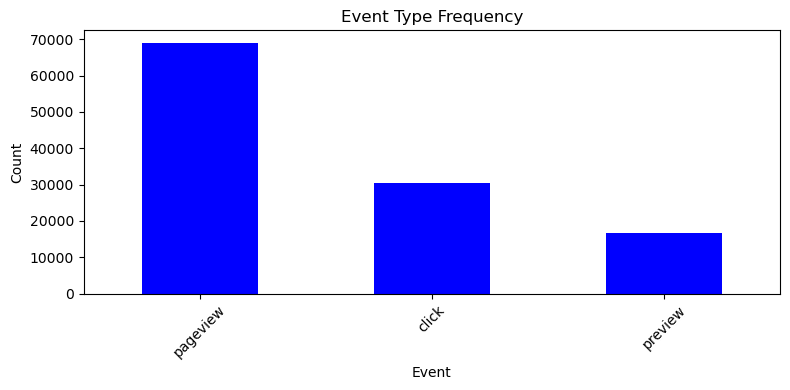

In [26]:
plt.figure(figsize=(8, 4))
df['event'].value_counts().plot(kind='bar', color='blue')
plt.title('Event Type Frequency')
plt.xlabel('Event')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Top 10 Countries by Event Count

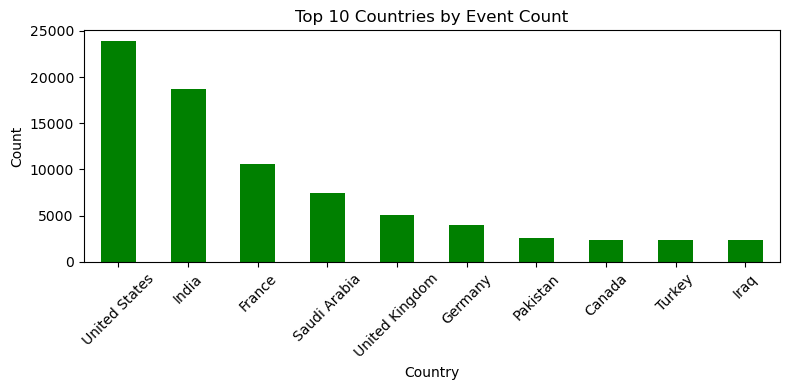

In [27]:
plt.figure(figsize=(8, 4))
df['country'].value_counts().head(10).plot(kind='bar', color='green')
plt.title('Top 10 Countries by Event Count')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Top 10 Artists

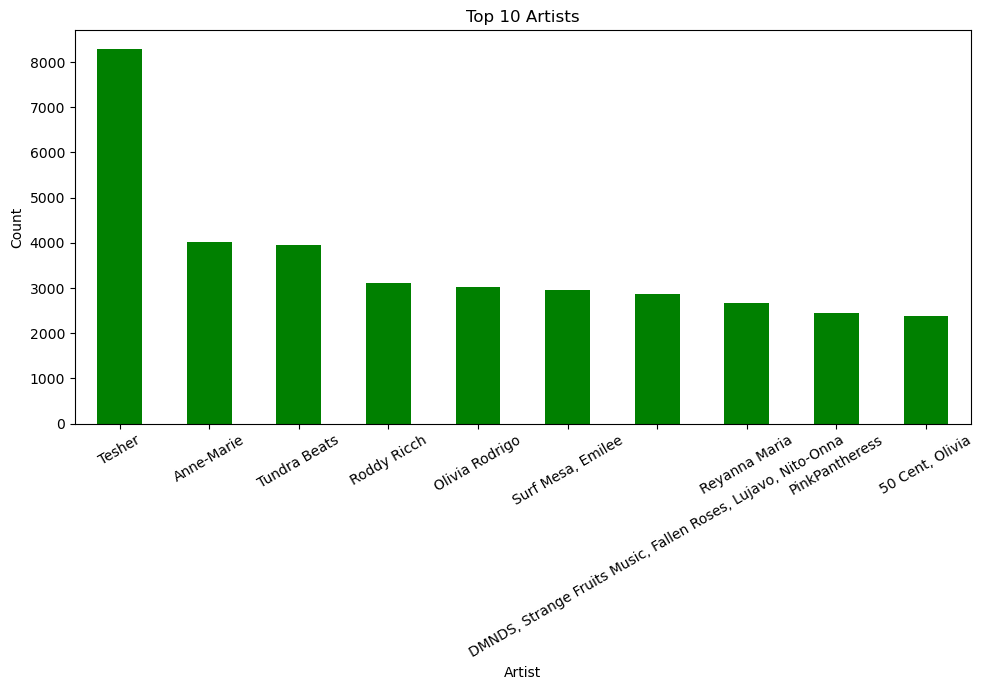

In [28]:
plt.figure(figsize=(10, 7))
df['artist'].value_counts().head(10).plot(kind='bar', color='green')
plt.title('Top 10 Artists')
plt.xlabel('Artist')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Bivariate Analysis

## Event Type by Country (Top 5 Countries)

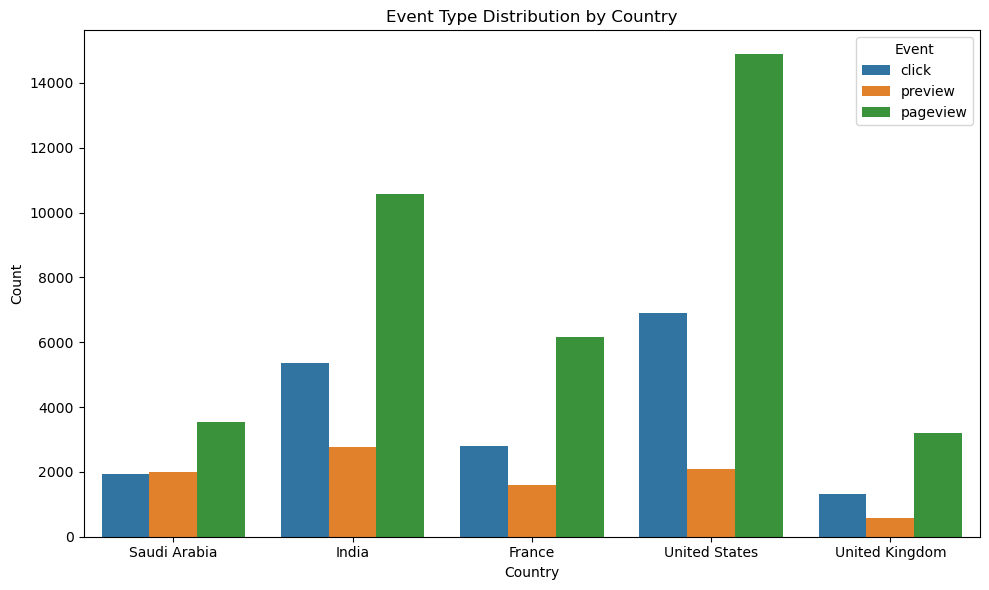

In [29]:
top_countries = df['country'].value_counts().head(5).index
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['country'].isin(top_countries)], x='country', hue='event')
plt.title('Event Type Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Event')
plt.tight_layout()
plt.show()

##  Monthly Trend of Events

In [30]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='month', order=sorted(df['month'].dropna().unique()))
plt.title('Monthly Event Distribution')
plt.xlabel('Month')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

KeyError: 'month'

<Figure size 1000x400 with 0 Axes>

## Artist vs Event Count (Top 10)

In [ ]:
top_artists = df['artist'].value_counts().head(10).index
plt.figure(figsize=(10, 4))
sns.countplot(data=df[df['artist'].isin(top_artists)], y='artist', hue='event')
plt.title('Top 10 Artists by Event Type')
plt.xlabel('Count')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()

## Plays Over Time

In [ ]:
df_by_date = df.groupby(df['date'].dt.date).size()

plt.figure(figsize=(12,5))
df_by_date.plot()
plt.title("Events Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Events")
plt.grid(True)
plt.tight_layout()
plt.show()